<a href="https://colab.research.google.com/github/num1foryou/PCVK_Genap2023/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import files
import io
import matplotlib.pyplot as plt 

Saving lubang.jpg to lubang (1).jpg
nama file:  lubang.jpg


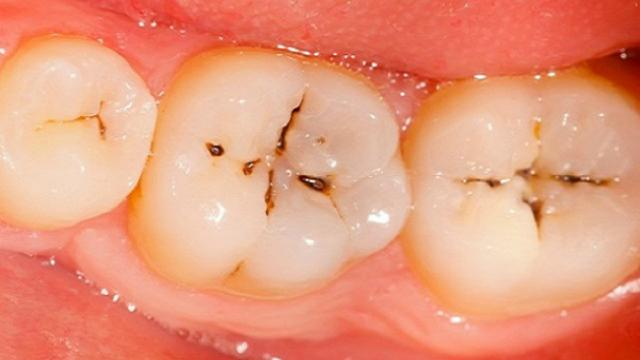

In [42]:
upload_files=files.upload()
for filename in upload_files.keys():upload_files.keys
print('nama file: ',filename)
citra=cv2.imread(filename)
cv2_imshow(citra)

In [ ]:
blue=citra[:,:,0]
green=citra[:,:,1]
red=citra[:,:,2]
b=np.average(blue)
g=np.average(green)
r=np.average(red)
print(b)
print(g)
print(r)

166.03609831029186
179.96852841781873
242.23614132104456


In [ ]:
if b>g:
  if b>=r:
    result=print('warna dominan: blue')
    print(b)

else:
  if g>=r:
    result=print('warna dominan: green')
    print(g)
  else:
    result=print('warna dominan: red')
    print(r)

warna dominan: red
242.23614132104456


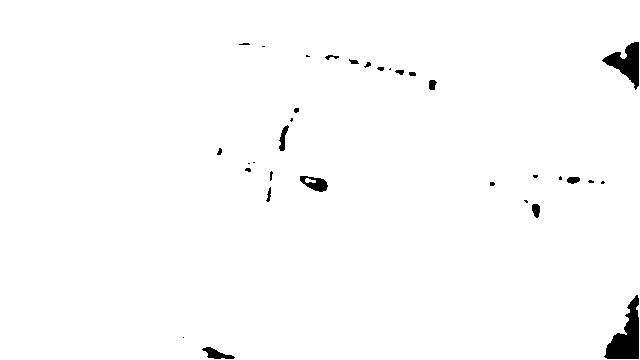

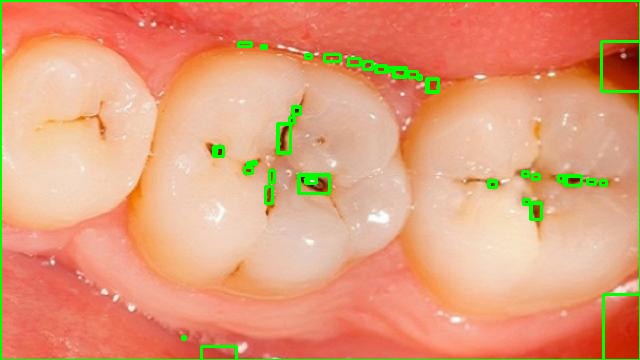

In [44]:
import cv2
import numpy as np

# Load image and convert to grayscale
imgr = citra
img = citra
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

# Apply bilateral filter to smooth the image while preserving edges
gray = cv2.bilateralFilter(gray, 5, 70, 70)

# Threshold the image to create a binary mask
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and draw a rectangle around each tooth
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

# Show the resulting image
cv2_imshow(thresh)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()